In this example, instruments are created in their own process using the `create_instruments` function. A datapoint fetches the parameters from each instrument asynchronously for faster data acq.

In [8]:
import squidpy
%matplotlib nbagg

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
instruments, ins_procs = squidpy.create_instruments((squidpy.Mock, .1, 'mock1'), (squidpy.Mock, .2, 'mock2'))
(mock1, mock2) = instruments

In [3]:
squidpy.set_logging_config() #create log file

In [6]:
test = squidpy.Experiment('my first experiment', instruments)
test.sweep('mock1.time')[0:10:.25]
test.measure()
test.run()

<IPython.core.display.Javascript object>


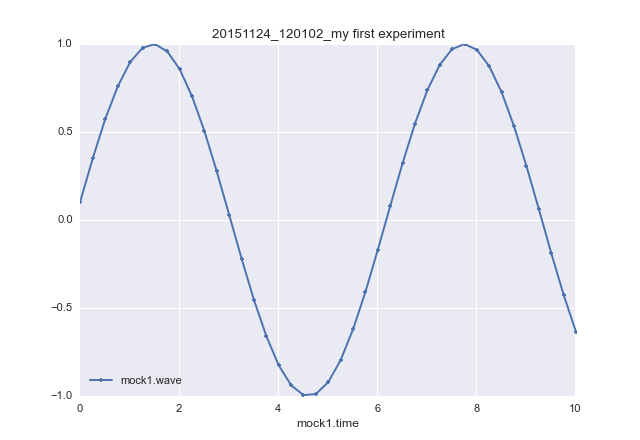

In [9]:
test.plot('mock1.time', 'mock1.wave', style='.-')
while test.running:
    test.update_plot()